In [2]:
import explorer as ue

/home/ben/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ben/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ben/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [3]:
explore = ue.UE()

In [4]:
explore.load_data('../image_umap.csv',filetype='csv')

In [5]:
explore.get_data_columns(print_cols=False, extra=["x", "y","Conc uM"])

In [6]:
explore.embed(metric='euclidean')

/home/ben/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


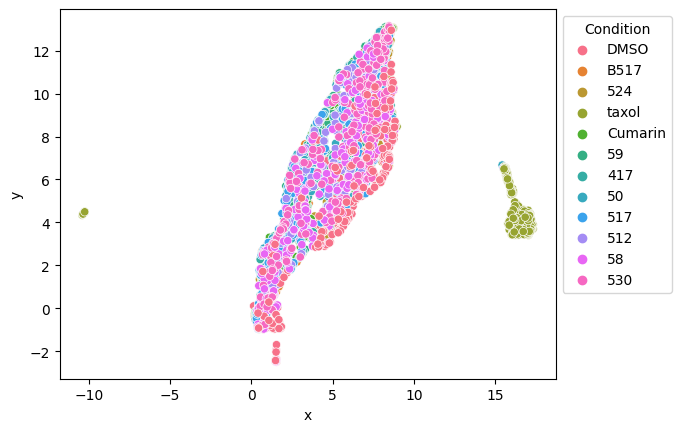

In [7]:
explore.plot(color_on='Condition')

In [8]:
explore.head()

,ImageNumber,Image_Count_Cell,Image_Count_Cytoplasm,Image_Count_Nucleus,Image_ExecutionTime_01Images,Image_ExecutionTime_02Metadata,Image_ExecutionTime_03NamesAndTypes,Image_ExecutionTime_04Groups,Image_ExecutionTime_05IdentifySecondaryObjects,Image_ExecutionTime_06IdentifyTertiaryObjects,...,Well_x,Cells_x,Condition_x,Well_y,Cells_y,Condition_y,Well,Cells,Condition,Conc uM
0,1,2795,2795,2795,0.0,0.0,0.265625,0.0,1.937500,0.484375,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001
1,2,1699,1699,1699,0.0,0.0,0.390625,0.0,10.046875,1.671875,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001
2,3,899,899,899,0.0,0.0,0.218750,0.0,6.062500,0.734375,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001
3,4,300,300,300,0.0,0.0,0.343750,0.0,2.718750,0.312500,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001
4,5,267,267,267,0.0,0.0,0.312500,0.0,2.593750,0.328125,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001


In [9]:
explore.shape()

(3455, 901)

In [10]:
import hdbscan

import igraph as ig
import leidenalg as la

In [25]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)

In [26]:
df = explore.df
data_cols = explore.data_cols

In [27]:
clusterer.fit(df[['x','y']])

HDBSCAN(gen_min_span_tree=True, min_cluster_size=3)

<Axes: >

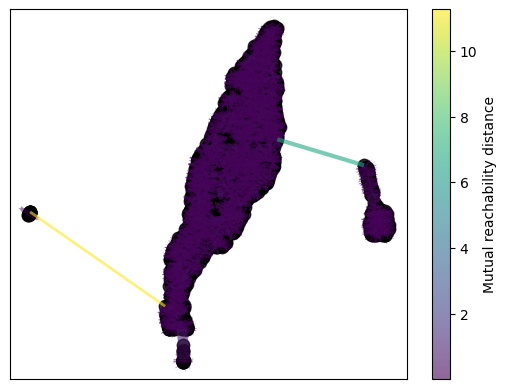

In [28]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2
                                     )

<Axes: ylabel='distance'>

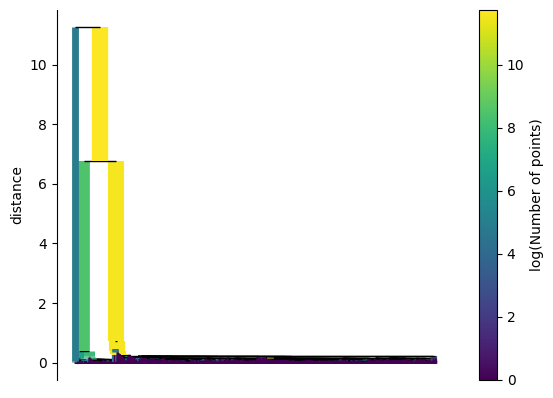

In [29]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

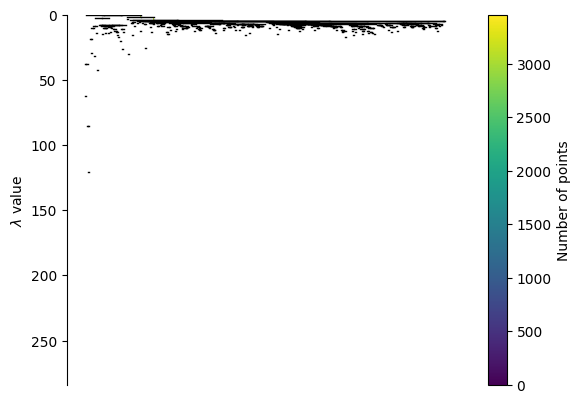

In [30]:
clusterer.condensed_tree_.plot()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='$\\lambda$ value'>

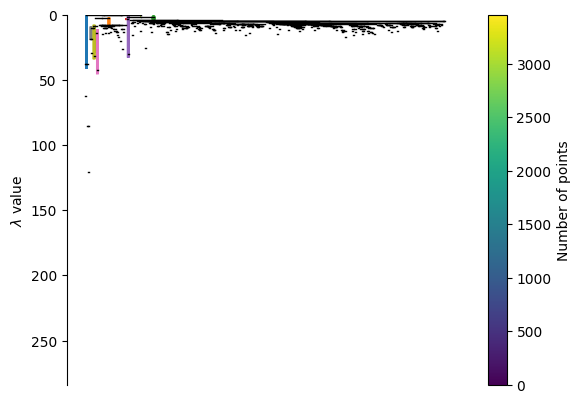

In [32]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [33]:
df['clussy'] = clusterer.labels_

<Axes: xlabel='x', ylabel='y'>

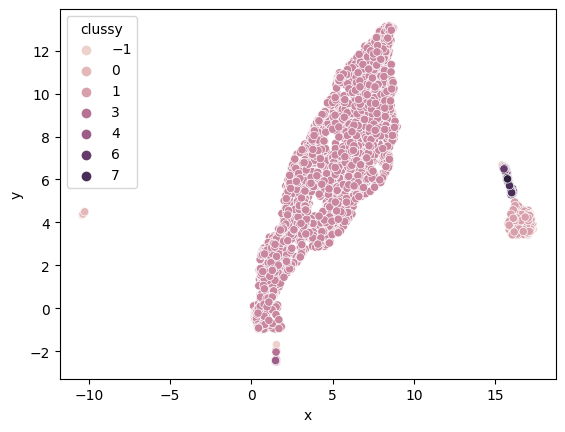

In [34]:
sns.scatterplot(data=df, x='x',y='y',hue='clussy')

In [21]:
# %pip install networkx
# import networkx as nx
# G = nx.from_pandas_edgelist
# partition = la.find_partition(df[['x','y']], la.ModularityVertexPartition)

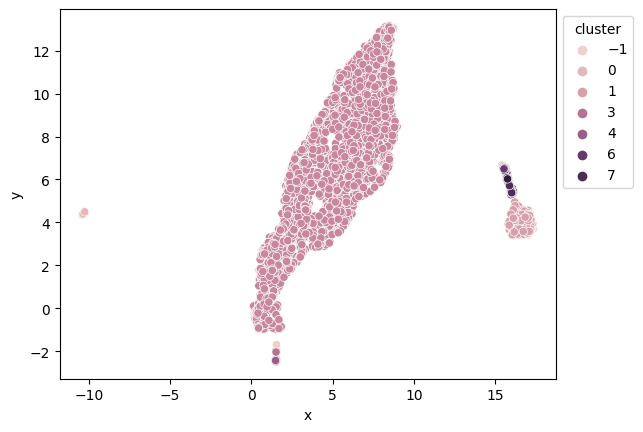

In [24]:
explore.cluster(min_clusters=3)
explore.plot(color_on='cluster')

In [1]:
df = explore.df

NameError: name 'explore' is not defined

In [ ]:
ax = sns.scatterplot(data=df.loc[df['cluster'].isin([ 1, 4, 6])], x='x', y='y', hue='Condition')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
clussy = [-1,0,3,]

In [ ]:
cent_x = df.loc[df['cluster'].isin([ 1, 4, 6]), 'x'].mean()
cent_y = df.loc[df['cluster'].isin([ 1, 4, 6]), 'y'].mean()
circle = plt.Circle(xy=(cent_x, cent_y), radius=3, color='red', fill=False, label="1, 4, 6")

circles = []
for c in clussy:
    cx = df.loc[df['cluster']==c, 'x'].mean()
    cy = df.loc[df['cluster']==c, 'y'].mean()
    circles.append(plt.Circle(xy=(cx,cy), radius=3, color='red', fill=False, label=c))

ax = sns.scatterplot(data=df, x='x', y='y', hue='Condition')
ax.add_patch(circle)
for c in circles:
    ax.add_patch(c)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.legend([circle], ["1, 4, 6"])

In [ ]:
fig, ax = plt.subplots()
a = sns.scatterplot(data=df.loc[df['Condition']!="524"], x='x',y='y', ax=ax)
b = sns.scatterplot(data=df.loc[df['Condition']=="524"], x='x',y='y', ax=ax)
ax.legend([a,b], ['not 524', '524'])